In [46]:
#Cargar las librerias necesarias

#Importamos las librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
import warnings
warnings.filterwarnings('ignore')

In [48]:
sex_ = {'Male':1,'Female':0}

In [88]:
# lectura de datos en Python y lo cargamos en la variable Datos

Datos = pd.read_csv('./Mall_Customers.csv')
Datos.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [70]:
Datos.shape

(200, 5)

In [81]:
sex_ = {'Male':1,'Female':0}

In [82]:
Datos['Gender']= Datos['Gender'].map(sex_)

In [50]:
Datos.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [83]:
Datos.describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.440000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,0.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000


In [84]:
#valores nulos
Datos.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [86]:
Datos.dropna()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [73]:
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [87]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)
X

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,-1.723412,-1.424569,-1.738999,-0.434801
1,-1.706091,-1.281035,-1.738999,1.195704
2,-1.688771,-1.352802,-1.700830,-1.715913
3,-1.671450,-1.137502,-1.700830,1.040418
4,-1.654129,-0.563369,-1.662660,-0.395980
...,...,...,...,...
195,1.654129,-0.276302,2.268791,1.118061
196,1.671450,0.441365,2.497807,-0.861839
197,1.688771,-0.491602,2.497807,0.923953
198,1.706091,-0.491602,2.917671,-1.250054


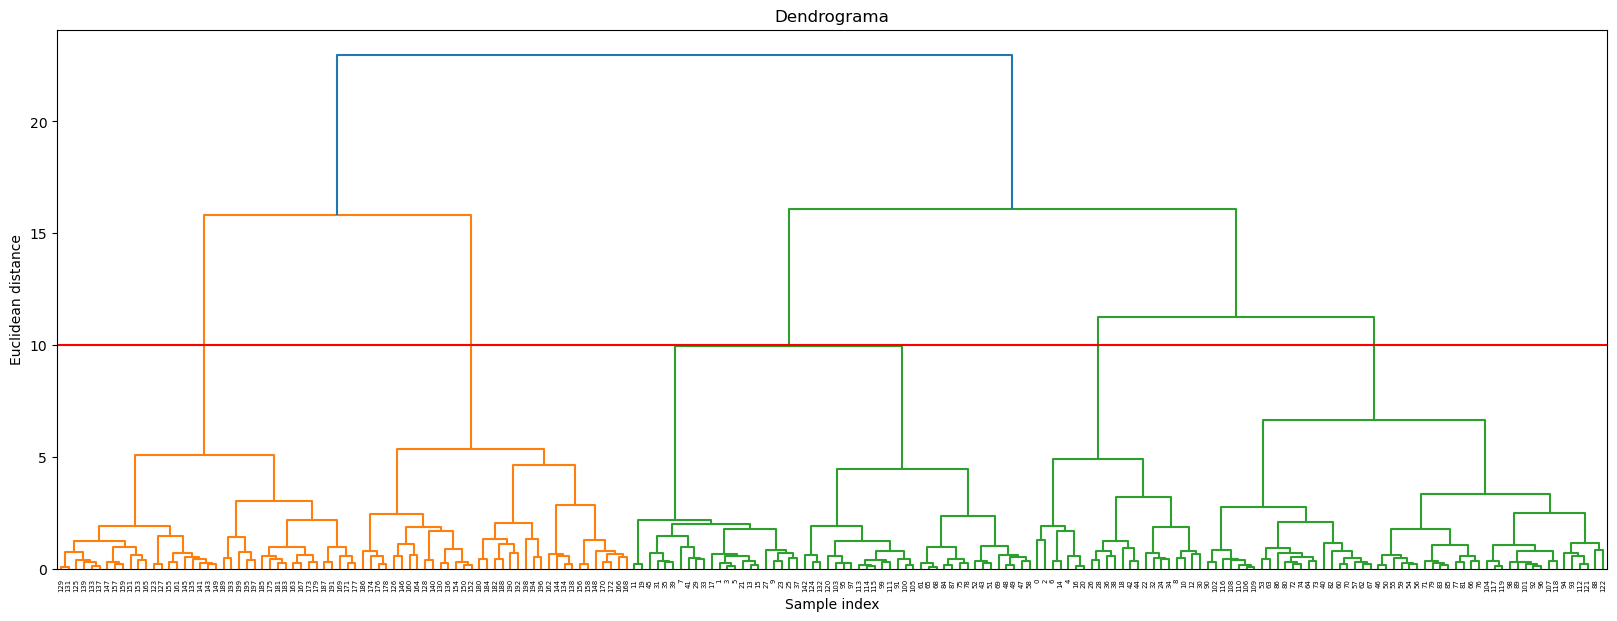

In [80]:
ward_clustering = linkage(X, method="ward", metric="euclidean")
plt.figure(figsize=(20, 7))
dendrogram(ward_clustering)
plt.axhline(y = 10, color = 'r', linestyle = '-')
plt.title('Dendrograma')
plt.xlabel('Sample index')
plt.ylabel('Euclidean distance')
plt.show()

In [89]:
clusters = fcluster (clustering_jerarquico, t=10, criterion= 'distance')

In [90]:
clusters

array([100,  85,  99,  85, 101,  85,  97,  84,  92,  87,  91,  83,  91,
        86,  98,  86, 102,  89, 104,  83, 102,  88,  95,  88,  96,  80,
       103,  90, 103,  80,  94,  78,  94,  81,  93,  77,  93,  79, 121,
        77, 122,  82, 120, 112, 120, 112, 117, 111, 111, 111, 117, 113,
       113, 115, 118, 118, 119, 108, 114, 119, 106,  73, 105, 116, 105,
        73,  68, 105,  73,  70, 107,  69, 109, 109, 109,  74,  72,  72,
        74,  71, 109,  72, 110,  71,  75,  71,  56,  75,  76,  55,  57,
        67,  55,  64,  64,  65,  55,  65,  52,  65,  66,  52,  58,  65,
        54,  66,  59,  53,  59,  59,  59,  62,  51,  62,  62,  62,  60,
        48,  61,  48,  63,  50,  49,  34,  24,  33,  50,  34,  20,  32,
        19,  32,  24,  31,  22,  35,  19,  31,  22,  31,  21,  35,  25,
        35,  23,  36,  14,  28,  11,  26,  10,  26,  10,  28,  10,  27,
        17,  29,  17,  29,  12,  27,  18,  42,  13,  30,  16,  42,  16,
        41,  15,  40,  15,  43,   4,  43,   4,  40,   4,  43,   

In [91]:
hier_clustering = AgglomerativeClustering(n_clusters=3)
labels_hier = hier_clustering.fit_predict(X)
labels_hier

array([1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2,
       1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [92]:
# Obtenemos las etiquetas de cada punto de nuestros datos
labels = labels_hier
colores=['red','green','cyan']
asignar=[]
for row in labels:
    asignar.append(colores[row])

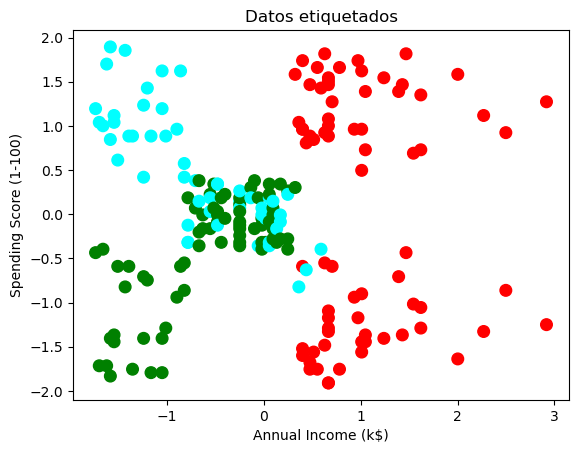

In [93]:
f1 = X['Annual Income (k$)'].values
f2 = X['Spending Score (1-100)'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.title('Datos etiquetados')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [94]:
#extrae todo lo del modelo y crea el endograma, con todas las observaciones
def plot_dendrogram(model, **kwargs):
    '''
    This function extracts the information from an AgglomerativeClustering model
    and plots its dendrogram with the dendrogram function from scipy.cluster.hierarchy
    '''
    from scipy.cluster.hierarchy import dendrogram
    import numpy as np    
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    distances = np.arange(model.children_.shape[0])
    linkage_matrix = np.column_stack([model.children_, distances, counts]).astype(float)
    # Plot
    plt.figure(figsize=(20, 7))
    dendrogram(linkage_matrix, **kwargs)
    plt.title('Dendrograma')
    plt.xlabel('Sample index')
    plt.ylabel('Euclidean distance')
    plt.show()

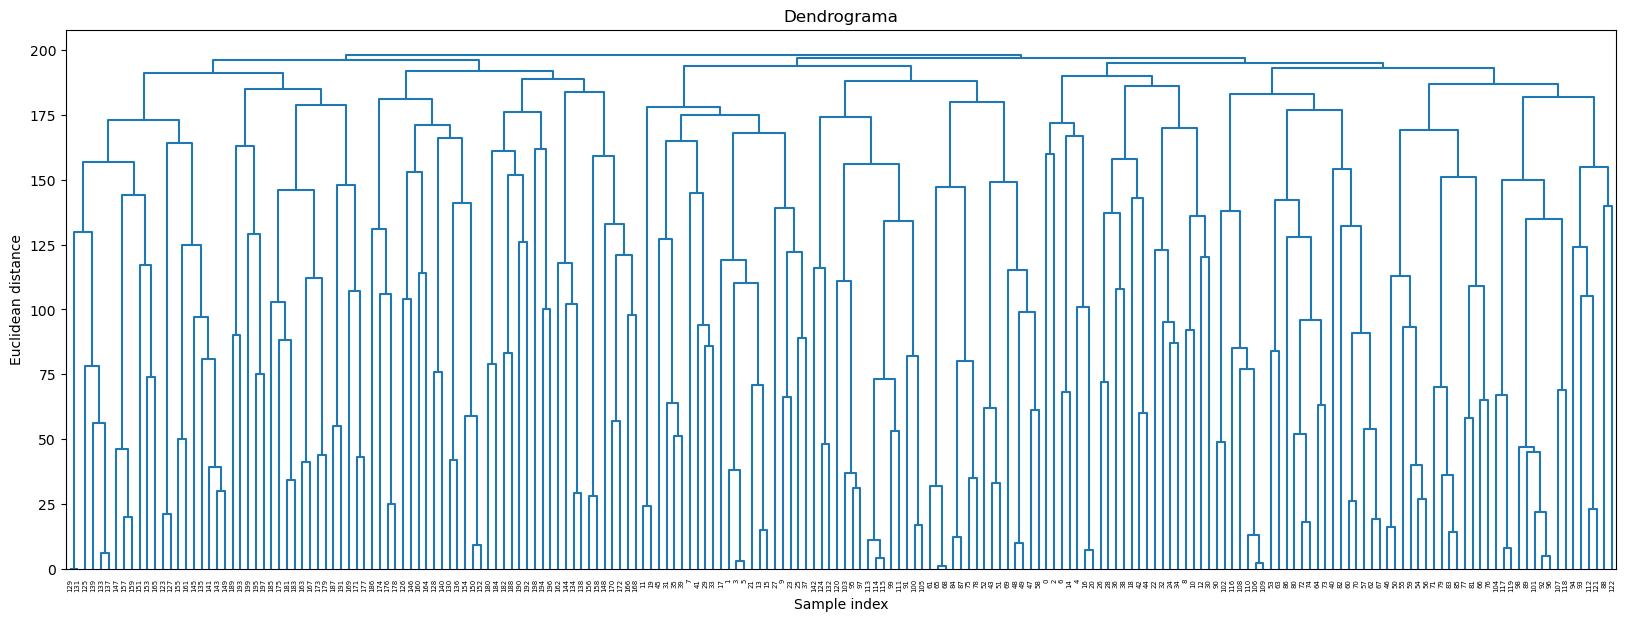

In [95]:
plot_dendrogram(hier_clustering, color_threshold=0)

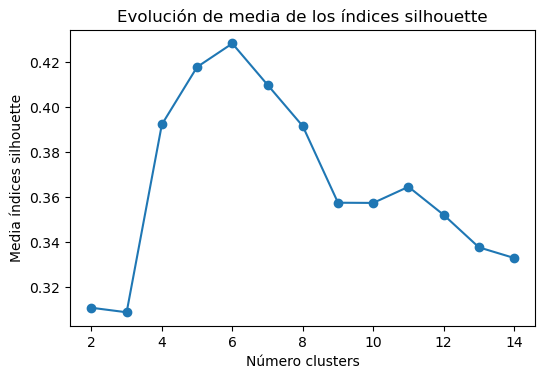

In [96]:
# Método silhouette para identificar el número óptimo de clusters

range_n_clusters = range(2, 15)
valores_medios_silhouette = []
for n_clusters in range_n_clusters:
    modelo = AgglomerativeClustering(
                    affinity   = 'euclidean',
                    linkage    = 'ward',
                    n_clusters = n_clusters
             )
    cluster_labels = modelo.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)
fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolución de media de los índices silhouette")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media índices silhouette');

In [97]:
# Calcular medidas de calidad para Clustering Jerárquico
print("\nMedidas de calidad para Clustering Jerárquico:")
print("Puntaje de silueta:", metrics.silhouette_score(X, labels_hier))
print("Índice de Calinski-Harabasz:", metrics.calinski_harabasz_score(X, labels_hier))
print("Davies-Bouldin Index:", metrics.davies_bouldin_score(X, labels_hier))


Medidas de calidad para Clustering Jerárquico:
Puntaje de silueta: 0.30874740679157575
Índice de Calinski-Harabasz: 94.85428751941517
Davies-Bouldin Index: 1.1302868682321934


In [98]:
# Calcular el coeficiente de correlación cofenética
from scipy.cluster.hierarchy import linkage
# Compute the distances
X_dist = pdist(X)
# Compute the linkage matrix
Z = linkage(X, 'ward')
# Calculate the cophenetic correlation coefficient
coef_cofenetico = cophenet(Z, X_dist)
print("Coeficiente de correlación cofenética:", coef_cofenetico)

Coeficiente de correlación cofenética: (0.644982688580315, array([16.06037879,  1.28415501, 16.06037879, ..., 15.79117249,
        0.74388365, 15.79117249]))
